<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Loading the data and other imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
# might be needed depending on your version of Jupyter

# *Load Data

In [ ]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

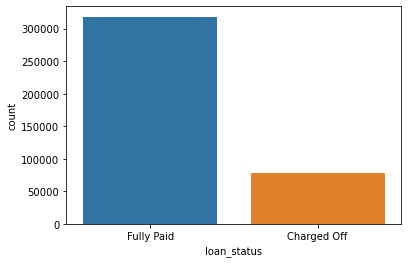

In [8]:
# CODE HERE
sns.countplot(data=df,x='loan_status')

**TASK: Create a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

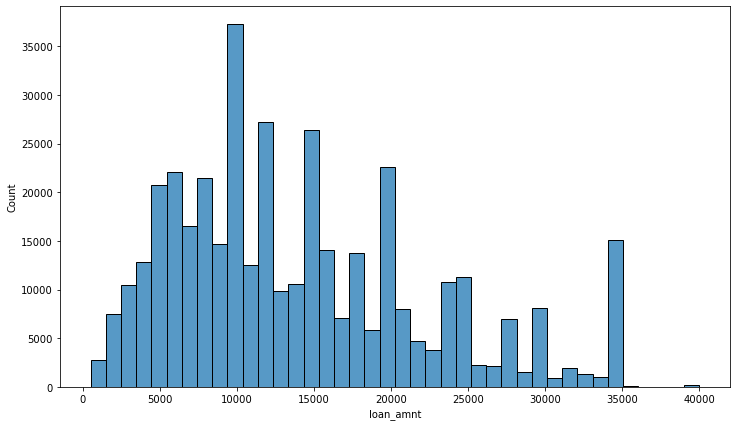

In [22]:
# CODE HERE
#plt.figure(figsize=(60,10))
plt.figure(figsize=(12,7))
sns.histplot(df['loan_amnt'],bins=40)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [15]:
# CODE HERE
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

<AxesSubplot:>

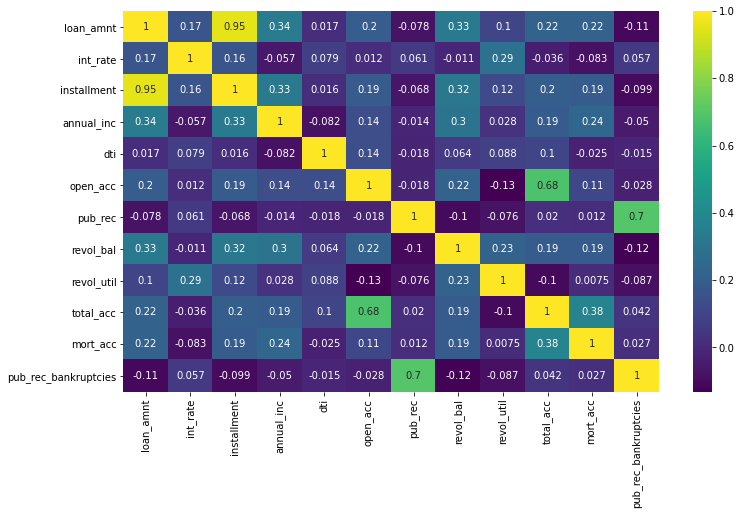

In [17]:
# CODE HERE
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

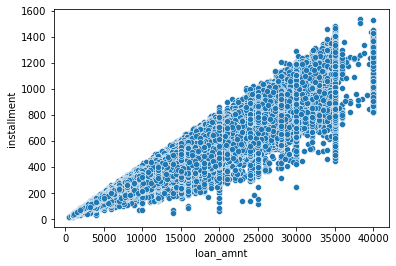

In [23]:
# CODE HERE
sns.scatterplot(data=df,x='loan_amnt',y='installment')

The monthly payment owed by the borrower if the loan originates.


**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

In [21]:
# CODE HERE

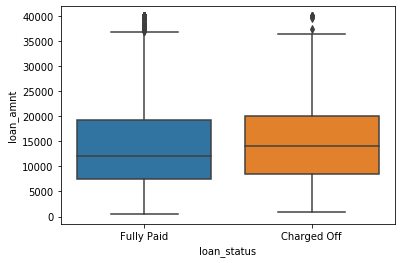

**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [24]:
# CODE HERE
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [25]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

In [36]:
# CODE HERE
df.groupby(['grade','loan_status'])['loan_status'].count()

grade  loan_status
A      Charged Off      4036
       Fully Paid      60151
B      Charged Off     14587
       Fully Paid     101431
C      Charged Off     22449
       Fully Paid      83538
D      Charged Off     18338
       Fully Paid      45186
E      Charged Off     11765
       Fully Paid      19723
F      Charged Off      5037
       Fully Paid       6735
G      Charged Off      1461
       Fully Paid       1593
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

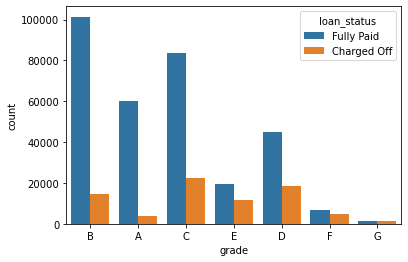

In [37]:
sns.countplot(data=df,x='grade',hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

In [66]:
np.sort(df['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

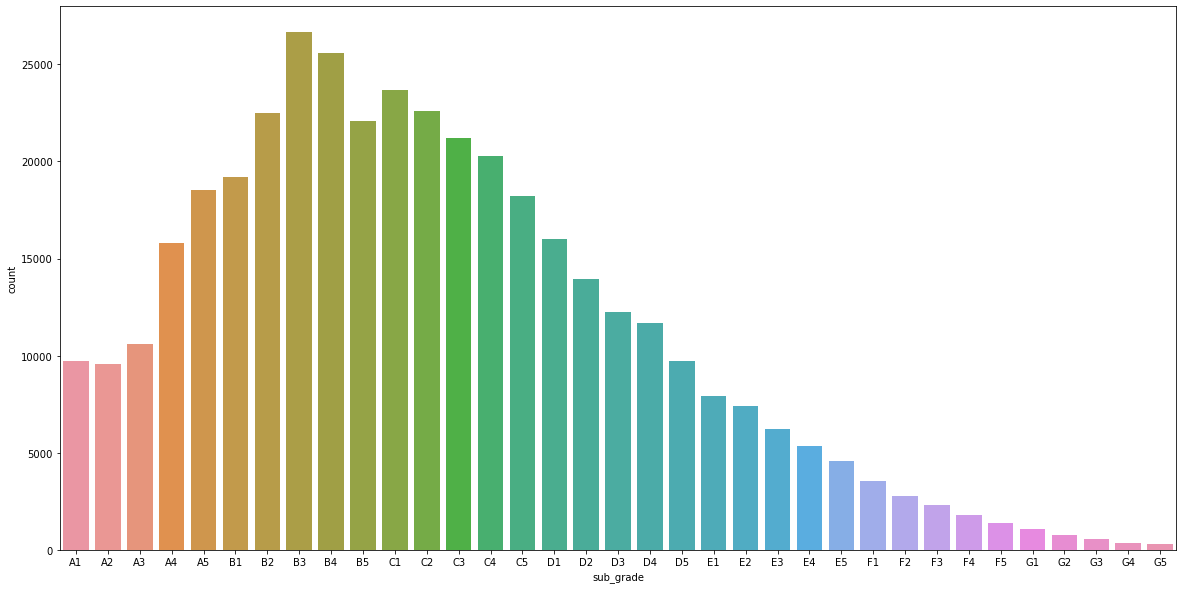

In [67]:
#CODE HERE
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='sub_grade',order=np.sort(df['sub_grade'].unique()))

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

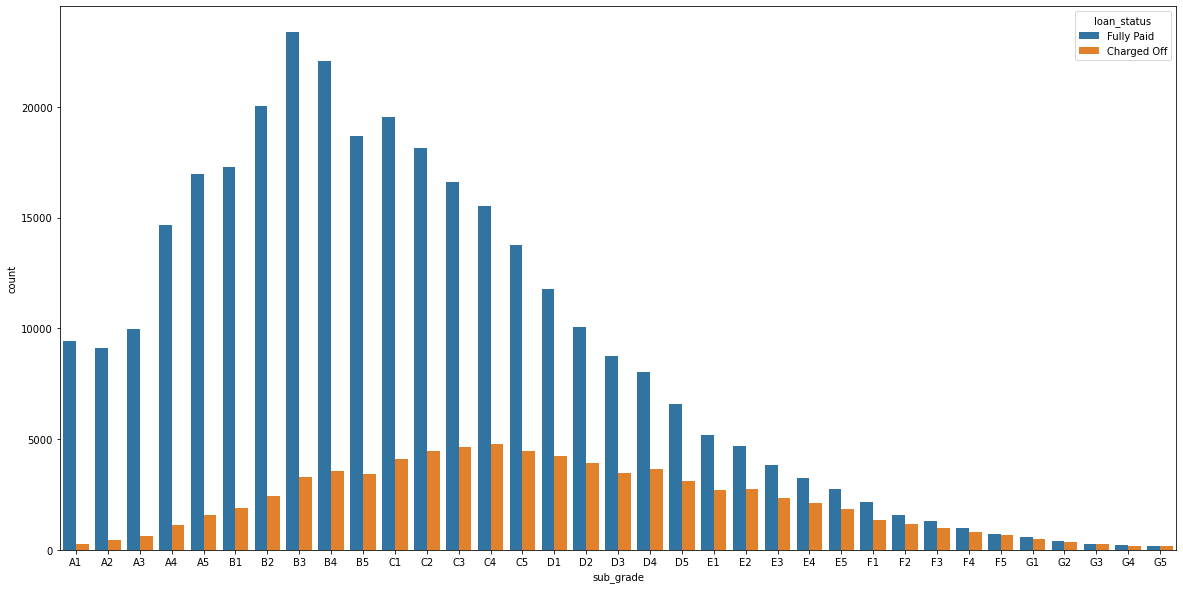

In [69]:
# CODE HERE
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='sub_grade',order=np.sort(df['sub_grade'].unique()),hue='loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [74]:
order_aux = np.sort(df['sub_grade'].unique())
order_aux = order_aux[25:]

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

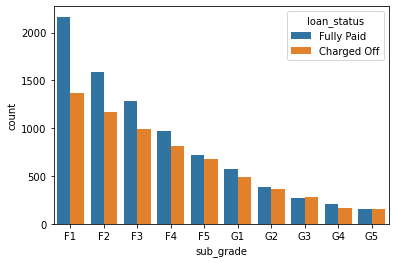

In [75]:
sns.countplot(data=df,x='sub_grade',order=order_aux,hue='loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

## *Create binary feature (loan_repaid) for loan_status feature

In [35]:
# CODE HERE

In [ ]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x =='Fully Paid' else 0)
df['loan_repaid'].value_counts()

In [83]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [92]:
df.corr()['loan_repaid']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

<AxesSubplot:ylabel='loan_repaid'>

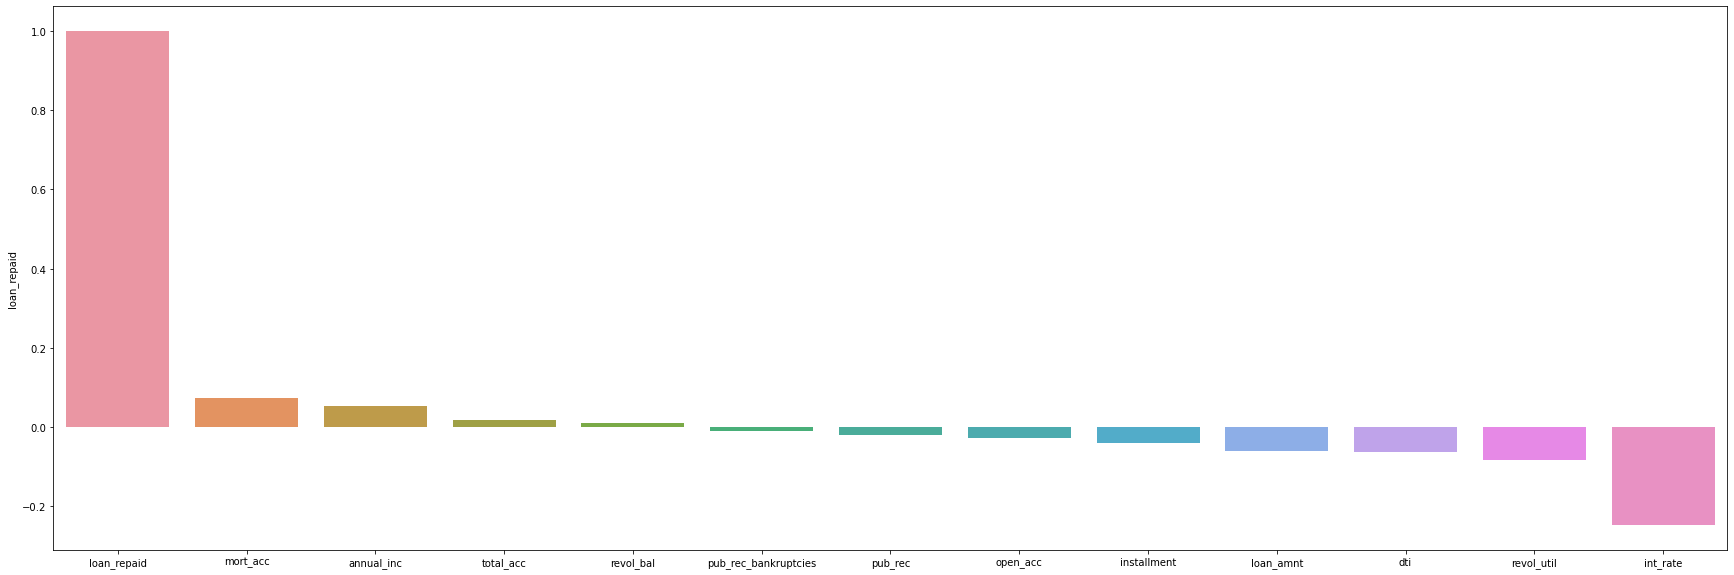

In [111]:
#CODE HERE
corr_aux =df.corr()['loan_repaid'].sort_values(ascending=False)
plt.figure(figsize=(30,10))
sns.barplot(x=corr_aux.index, y=corr_aux)

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



## Missing Data and irrelevant features

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [113]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [122]:
# CODE HERE
len(df) - df.notnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [123]:
# CODE HERE
(len(df) - df.notnull().sum())/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

** The job title supplied by the Borrower when applying for the loan.*
** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

**TASK: How many unique employment job titles are there?**

In [124]:
# CODE HERE
len(df['emp_title'].unique())

173106

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

### *Drop emp_title

In [219]:
# CODE HERE
df=df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [142]:
# CODE HERE
df['emp_length'].value_counts().index

Index(['10+ years', '2 years', '< 1 year', '3 years', '5 years', '1 year',
       '4 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object')

<AxesSubplot:xlabel='emp_length', ylabel='count'>

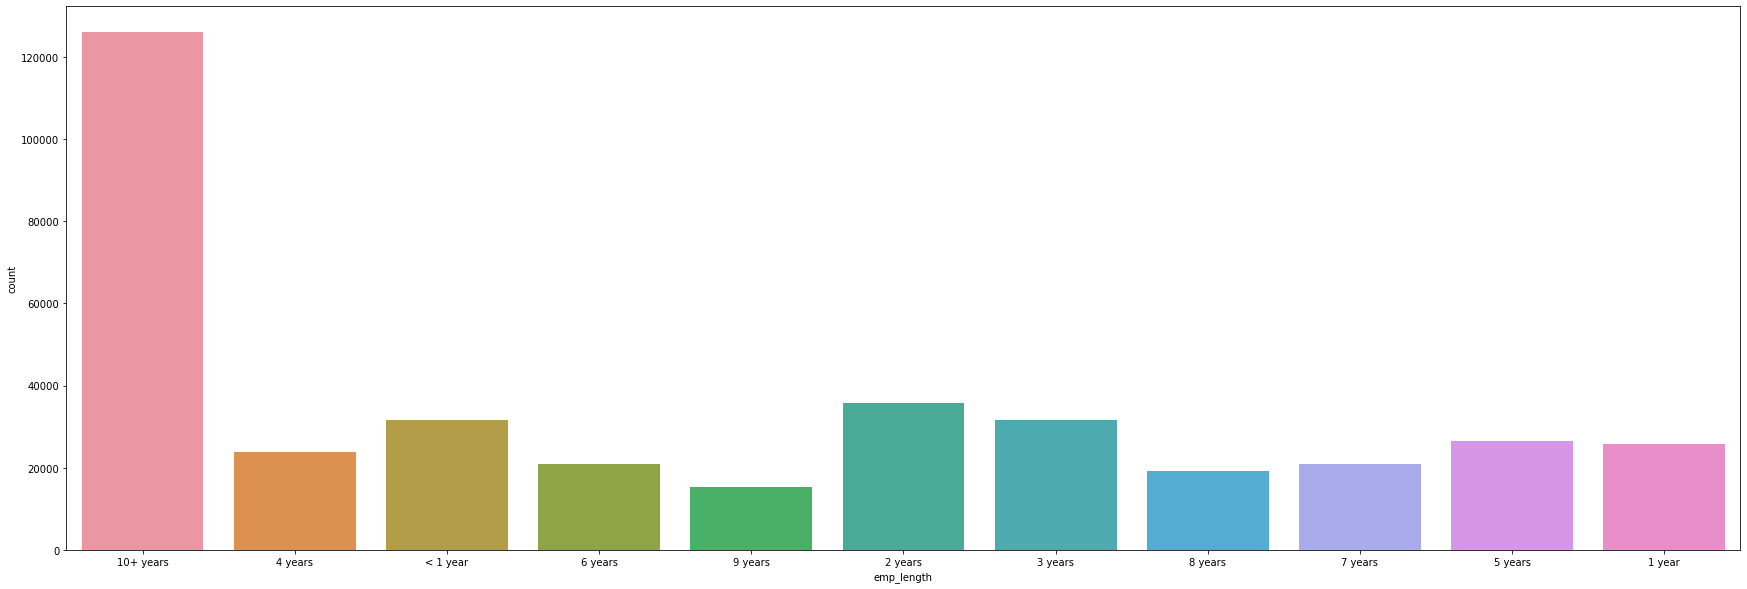

In [152]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['emp_length'])

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

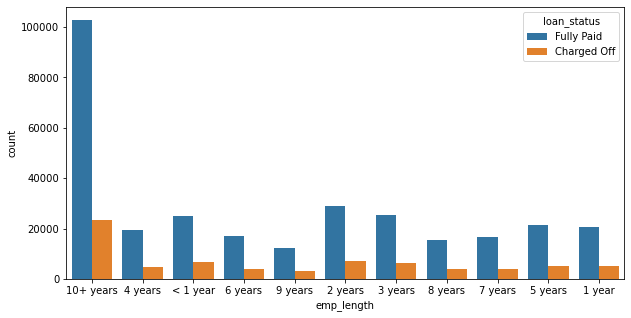

In [157]:
# CODE HERE
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length',hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [61]:
# CODE HERE

<AxesSubplot:xlabel='emp_length'>

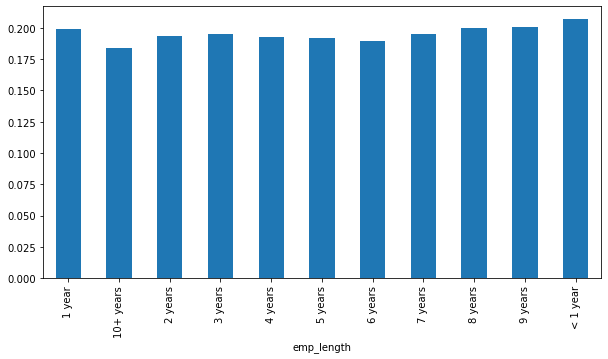

In [189]:
plt.figure(figsize=(10,5))
aux =df.groupby(['emp_length','loan_status'])['emp_length'].count()
aux= aux.unstack()
aux['per_fully_paid'] = aux['Charged Off']/(aux['Charged Off'] + aux['Fully Paid'])
aux['per_fully_paid'].plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

### *Drop emp_length

In [220]:
df=df.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [195]:
len(df) - df.notnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [196]:
# CODE HERE
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [49]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

### *Drop title

In [221]:
# CODE HERE
df = df.drop('title',axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [75]:
# Number of mortgage accounts.

**TASK: Create a value_counts of the mort_acc column.**

In [56]:
# CODE HERE
df_aux['mort_acc'].isna().sum()

37795

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [200]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

### *Fill NaN values in mort_acc feature with the mean based in group of mort_acc registers pointed by the most correlated feature (total_acc)

Mort_acc has high NaN values. As we have high correlation between mort_acc and total_acc, the mean in mort_acc for the  registers grouped by total_acc values is a aproximation for NaN values in  mort_acc

In [222]:
# CODE HERE
mortAcc_mean_by_totalAcc_groups = df.groupby(['total_acc'])['mort_acc'].mean()
df['mort_acc']= df.apply(lambda x: mortAcc_mean_by_totalAcc_groups[x['total_acc']] if np.isnan(x['mort_acc']) else x['mort_acc'],axis=1)

In [192]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

### *Dropna

In [223]:
# CODE HERE
df.dropna(inplace=True)

In [36]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [251]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


#### *Get numerical part of string in term feature and convert for int64

In [224]:
# CODE HERE
df['term']=df['term'].str.replace(r' *months',r'',regex=True)
df['term']=df['term'].astype('int64')
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

#### *Drop grade

In [225]:
df.drop('grade',inplace=True,axis=1)

### sub_grade feature

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

#### *Dummies for sub_grade

In [226]:
# CODE HERE
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

### verification_status, application_type,initial_list_status and purpose fetures

**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

#### *Dummies verification_status, application_type,initial_list_status end purpose

In [227]:
# CODE HERE
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358014 entries, 0 to 396028
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            358014 non-null  float64
 1   term                                 358014 non-null  int64  
 2   int_rate                             358014 non-null  float64
 3   installment                          358014 non-null  float64
 4   home_ownership                       358014 non-null  object 
 5   annual_inc                           358014 non-null  float64
 6   issue_d                              358014 non-null  object 
 7   loan_status                          358014 non-null  object 
 8   dti                                  358014 non-null  float64
 9   earliest_cr_line                     358014 non-null  object 
 10  open_acc                             358014 non-null  float64
 11  pub_rec      

### home_ownership feature
**TASK:Review the value_counts for the home_ownership column.**

In [ ]:
df['home_ownership'].value_counts()

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

#### *Agregate low types in home_ownership feature and get the dummies for it

In [228]:
#CODE HERE
df['home_ownership'] = df['home_ownership'].str.replace(r'NONE|ANY',r'OTHER',regex=True)

In [72]:
df['home_ownership'].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           66
Name: home_ownership, dtype: int64

In [229]:
dummy= pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummy],axis=1)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358014 entries, 0 to 396028
Data columns (total 73 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            358014 non-null  float64
 1   term                                 358014 non-null  int64  
 2   int_rate                             358014 non-null  float64
 3   installment                          358014 non-null  float64
 4   annual_inc                           358014 non-null  float64
 5   issue_d                              358014 non-null  object 
 6   loan_status                          358014 non-null  object 
 7   dti                                  358014 non-null  float64
 8   earliest_cr_line                     358014 non-null  object 
 9   open_acc                             358014 non-null  float64
 10  pub_rec                              358014 non-null  float64
 11  revol_bal    

### Address feature
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

#### *Get the zip code in adress feature

In [230]:
aux= df['address'].str.split('\n')
aux =aux.apply(lambda x: x[1])
df['zip_code'] = aux.replace(r'.*([0-9]{5})$',r'\1',regex=True)
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

#### *Get dummies for zip_code feature and drop address and zip_code

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [231]:
dummy= pd.get_dummies(df['zip_code'],drop_first=True)
df.drop(['address','zip_code'],inplace=True,axis=1)
df = pd.concat([df,dummy],axis=1)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358014 entries, 0 to 396028
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            358014 non-null  float64
 1   term                                 358014 non-null  int64  
 2   int_rate                             358014 non-null  float64
 3   installment                          358014 non-null  float64
 4   annual_inc                           358014 non-null  float64
 5   issue_d                              358014 non-null  object 
 6   loan_status                          358014 non-null  object 
 7   dti                                  358014 non-null  float64
 8   earliest_cr_line                     358014 non-null  object 
 9   open_acc                             358014 non-null  float64
 10  pub_rec                              358014 non-null  float64
 11  revol_bal    

### issue_d feature

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

#### *Drop issue_d

In [232]:
#CODE HERE
df.drop('issue_d',axis=1,inplace=True)

### earliest_cr_line feature
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

#### *Get year in earliest_cr_line, convert to int32 and Drop the original feature

In [233]:
#CODE HERE
df['earliest_cr_year'] = df['earliest_cr_line'].str.replace(r'.*([0-9]{4}$)',r'\1',regex=True)
df['earliest_cr_year']= df['earliest_cr_year'].astype('int64')
df.drop('earliest_cr_line',inplace=True,axis=1)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358014 entries, 0 to 396028
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            358014 non-null  float64
 1   term                                 358014 non-null  int64  
 2   int_rate                             358014 non-null  float64
 3   installment                          358014 non-null  float64
 4   annual_inc                           358014 non-null  float64
 5   loan_status                          358014 non-null  object 
 6   dti                                  358014 non-null  float64
 7   open_acc                             358014 non-null  float64
 8   pub_rec                              358014 non-null  float64
 9   revol_bal                            358014 non-null  float64
 10  revol_util                           358014 non-null  float64
 11  total_acc    

### loan_status feature

#### *Drop loan_status (we'll use laan_repaid)

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [234]:
df.drop('loan_status',inplace=True,axis=1)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   dti                                  395219 non-null  float64
 6   open_acc                             395219 non-null  float64
 7   pub_rec                              395219 non-null  float64
 8   revol_bal                            395219 non-null  float64
 9   revol_util                           395219 non-null  float64
 10  total_acc                            395219 non-null  float64
 11  mort_acc     

## Save and load dataset

In [ ]:
import pandas as pd

In [235]:
df.to_csv('proc.csv')

In [13]:
df = pd.read_csv('proc.csv')

# Section 3: Training Model

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**TASK: Set X and y variables to the .values of the features and label.**

In [15]:
X= df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [36]:
X.shape

(395219, 79)

In [121]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [31]:
norm = MinMaxScaler()
X_train =norm.fit_transform(X_train)
X_test = norm.transform(X_test)# utiliza a normalização calculada com os dados de treinamento sobre os dados de teste

In [38]:
X_train.shape

(316175, 79)

## Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Input,Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [43]:
X.shape

(395219, 79)

In [9]:
model = Sequential()
model.add(Input(X.shape[1],))
# hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
# hidden layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1,activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [10]:
model.fit(X_train,y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),verbose=2)

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 - 6s - loss: 0.3156 - val_loss: 0.2672
Epoch 2/25
316175/316175 - 6s - loss: 0.2672 - val_loss: 0.2633
Epoch 3/25
316175/316175 - 7s - loss: 0.2640 - val_loss: 0.2628
Epoch 4/25
316175/316175 - 7s - loss: 0.2624 - val_loss: 0.2626
Epoch 5/25
316175/316175 - 7s - loss: 0.2616 - val_loss: 0.2619
Epoch 6/25
316175/316175 - 9s - loss: 0.2611 - val_loss: 0.2625
Epoch 7/25
316175/316175 - 7s - loss: 0.2607 - val_loss: 0.2617
Epoch 8/25
316175/316175 - 6s - loss: 0.2604 - val_loss: 0.2617
Epoch 9/25
316175/316175 - 5s - loss: 0.2600 - val_loss: 0.2610
Epoch 10/25
316175/316175 - 6s - loss: 0.2598 - val_loss: 0.2621
Epoch 11/25
316175/316175 - 5s - loss: 0.2595 - val_loss: 0.2612
Epoch 12/25
316175/316175 - 6s - loss: 0.2594 - val_loss: 0.2621
Epoch 13/25
316175/316175 - 5s - loss: 0.2591 - val_loss: 0.2610
Epoch 14/25
316175/316175 - 6s - loss: 0.2588 - val_loss: 0.2612
Epoch 15/25
316175/316175 - 5s - loss: 0.2587 - 

## Save or load your model

In [12]:
model.save('mod1.h5')

In [4]:
model = load_model('mod1.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
model.

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000225AEBA4D88>>

In [10]:
# CODE HERE
mod=pd.DataFrame(model.history.history)# não é possível recuperar history de um modelo salvo
mod.columns

AttributeError: 'Sequential' object has no attribute 'history'

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

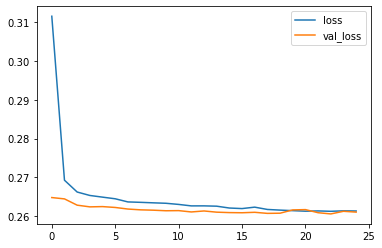

In [246]:
plt.figure(figsize=(10,5))
mod.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

Remember definition for binary classification:

1 = Fully Paid

0 = Charged Off

In [20]:
# CODE HERE
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
predict_test_set=model.predict_classes(X_test)

<img src="recall_precision_f1score.PNG" width="300" height="400">

Importants general values: 'weighted avg'. Weighted avg is the weighted average by support, where support is accurrencies of each class

In [26]:
print(classification_report(y_test,predict_test_set)) # print for format table

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [ ]:
# Good general f1-score: 0,87 (f1-score range: 0-1 where 0 is bad and 1 is perfect)

<img src="mx_confusion.PNG">

In [27]:
confusion_matrix(y_test,predict_test_set)

[[ 6779  8879]
 [   46 63340]]


**TASK: Given the customer below, would you offer this person a loan?**

In [34]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

Unnamed: 0          305323.00
loan_amnt            25000.00
term                    60.00
int_rate                18.24
installment            638.11
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      1996.00
Name: 304691, Length: 79, dtype: float64

In [46]:
new_customer=np.reshape(new_customer.values,(1,-1))
new_customer.shape

In [48]:
new_customer=norm.transform(new_customer)

In [49]:
model.predict_classes(new_customer)

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [50]:
df.loc[random_ind,'loan_repaid']

1

# GREAT JOB!